# ***Women and world happiness***

### Importing the data 

In [1]:
# World Happiness datasets 2015-2017 from Kaggle (https://www.kaggle.com/unsdsn/world-happiness) 
# Gender Statistics 2015 - 2018 from the World Bank (https://databank.worldbank.org/data/source/gender-statistics)

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
plt.rcParams['figure.figsize'] = 10,8

df_2015 = pd.read_csv('https://storage.googleapis.com/kaggle-datasets/894/2508/2015.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1553212927&Signature=sCx1FnfghjJjrrTtnemkQGbOAQzJgJ4Hf2r%2B%2BiX2QpQamWn%2FYpXPgOGbiknDc4ZcNbq%2BB0Dy9DVSYK5Hp5qxQR7TXgLgOHdTqWol17QnvTfnGl2K09PE8AhPYOXdc5jqxAIIDsSyITf1d%2BbuQu3fBXd6XkKQRpUY0eaCPKNQRYlD7EZVRK07JD5NuGAEaxoN4W2szEnvi7ZN7Y%2FDgHKS%2B273uyPf9jtSAl4YrSC3U8A%2FfIK0bpDGGxcKQu1D4IpXgkDa3pHRiRgT3ugR%2FPPbxacJyQ%2F4btzaiKw3mYxNsRnSCfvSK2%2B4Pb2v2I3ZbqKI9wAiQz9ntRQkbocIQ%2FHMTA%3D%3D')
df_2016 = pd.read_csv('https://storage.googleapis.com/kaggle-datasets/894/2508/2016.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1553212957&Signature=BzSwoZtxQhettrK4EpY4Mgfm%2FPROqREmRwATUvH2rK1zXrOXsDa7ZkxFdu%2BNZpVph5EiuTCvI7XRrsQsCw83PDs%2FYy88uyvlg%2Fxqc3BDPgn4%2BHupl7aZwBxXDhDWqipAexxIOL0%2B5j2GeX79k90Sn12dzPuuXVnSEQ%2F%2B5uWcijpNQVguTwlh%2FwsouTOoVxYxkOFDiGKBFO0AgMxYBPEU2nCG9Z98CKrYb0CHX1%2F7dJxMbUnLzUMvSnq%2BDSimFQD1tfwKvvG8LIuaZ0HV1DqvsrcSfynsNYInhlS9CXzXHtpqvEK2UH1d58%2B7o9z7QckMPv4jRQD6Xe5WsCA5Ry6nFA%3D%3D')
df_2017 = pd.read_csv('https://storage.googleapis.com/kaggle-datasets/894/2508/2017.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1553212981&Signature=ZEkLwsnUpqn74HJpQ31Y4ycnd6qEPQTiwX5sBCVO9TzRjRNYFrlLYwnDfx886wXeLvnz1aLE%2BSBPUUKLst9BKydynNgBGYk9vA8CgZ9jrZoYw5cCUL96yNS%2BYeqLdAjS1r18txNkVTBfHaINmbcPMiqG5sbX4YJJDiP6iK7p1p2QrYH5QNwzXe%2BuY9jSWWJnVWwLcN9eyf%2BcH6r0C877rdLCGEpTb03k5VcU2%2FCXJhBRzbr3EosgEkOuVSs6xf8DI%2B1ajLoSY9RVJU7RIyfqDj6MW04GdqG1iZDJyHmagq4H8QokDY0fP9XLWwi2dWkaHj0sAC7IFLWotvrQi6jGUA%3D%3D')
df_gender_stats = pd.read_csv('Data_Extract_From_Gender_Statistics/Gender_Stats_Final.csv', na_values="..")


In [2]:
df_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
Country                          158 non-null object
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


In [3]:
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
Country                          157 non-null object
Region                           157 non-null object
Happiness Rank                   157 non-null int64
Happiness Score                  157 non-null float64
Lower Confidence Interval        157 non-null float64
Upper Confidence Interval        157 non-null float64
Economy (GDP per Capita)         157 non-null float64
Family                           157 non-null float64
Health (Life Expectancy)         157 non-null float64
Freedom                          157 non-null float64
Trust (Government Corruption)    157 non-null float64
Generosity                       157 non-null float64
Dystopia Residual                157 non-null float64
dtypes: float64(10), int64(1), object(2)
memory usage: 16.0+ KB


In [4]:
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
Country                          155 non-null object
Happiness.Rank                   155 non-null int64
Happiness.Score                  155 non-null float64
Whisker.high                     155 non-null float64
Whisker.low                      155 non-null float64
Economy..GDP.per.Capita.         155 non-null float64
Family                           155 non-null float64
Health..Life.Expectancy.         155 non-null float64
Freedom                          155 non-null float64
Generosity                       155 non-null float64
Trust..Government.Corruption.    155 non-null float64
Dystopia.Residual                155 non-null float64
dtypes: float64(10), int64(1), object(1)
memory usage: 14.6+ KB


### Preparing the data

**World Happiness Datasets**

In [5]:
# The number of columns in the datasets differ, so for the purpose of this project, I am dropping the columns
# that are not common between datasets and also might not be relevant for ths anlysis.

# 2015 dataset -> "Standard Error"
# 2016 dataset -> "Lower Confidence Interval" and "Upper Confidence Interval"
# 2017 dataset -> "Whisker.high" and "Whisker.low"

df_2015 = df_2015.drop("Standard Error", axis=1)
df_2016 = df_2016.drop(["Lower Confidence Interval","Upper Confidence Interval"], axis=1)
df_2017 = df_2017.drop(["Whisker.high", "Whisker.low"], axis=1)


In [6]:
# Mapping Region for the 2017 dataset based on the 2016 dataset using the Country

df_2017_region = df_2017['Country'].map(df_2016.set_index('Country')['Region'])
df_2017.insert(loc=1 ,column='Region', value=df_2017_region)


In [7]:
# Are there any missing values after mapping ? Of course yes
df_2017[df_2017['Region'].isnull()]

,Country,Region,Happiness.Rank,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
32,Taiwan Province of China,NaN,33,6.422,1.433627,1.384565,0.793984,0.361467,0.258360,0.063829,2.126607
70,"Hong Kong S.A.R., China",NaN,71,5.472,1.551675,1.262791,0.943062,0.490969,0.374466,0.293934,0.554633
112,Mozambique,NaN,113,4.550,0.234306,0.870701,0.106654,0.480791,0.322228,0.179436,2.355651
138,Lesotho,NaN,139,3.808,0.521021,1.190095,0.000000,0.390661,0.157497,0.119095,1.429835
154,Central African Republic,NaN,155,2.693,0.000000,0.000000,0.018773,0.270842,0.280876,0.056565,2.066005


In [8]:
# Populating the 'Region' missing values in the 2017 dataset
df_2017.loc[df_2017['Country'].isin(['Mozambique', 'Lesotho', 'Central African Republic']), 'Region'] = 'Sub-Saharan Africa'
df_2017.loc[df_2017['Country'].isin(['Hong Kong S.A.R., China','Taiwan Province of China']), 'Region'] = 'Eastern Asia'

In [9]:
df_2017.groupby(['Region']).median()['Happiness.Rank']

Region
Australia and New Zealand            9.0
Central and Eastern Europe          73.0
Eastern Asia                        63.0
Latin America and Caribbean         43.5
Middle East and Northern Africa     74.0
North America                       10.5
Southeastern Asia                   76.5
Southern Asia                      110.0
Sub-Saharan Africa                 131.0
Western Europe                      17.0
Name: Happiness.Rank, dtype: float64

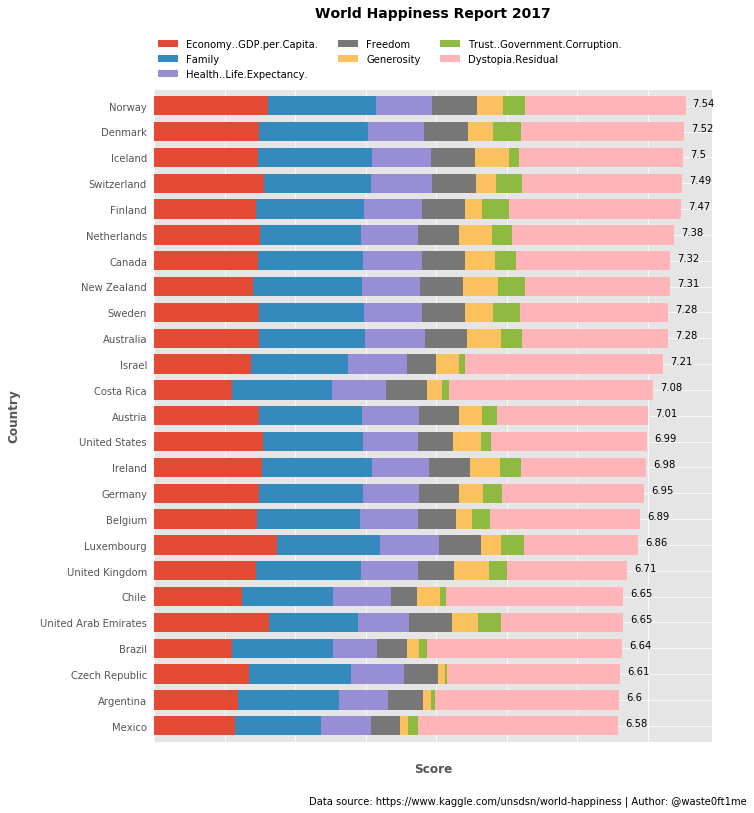

In [10]:
#df_2015[df_2015['Region'].isnull()]
#plt.style.use('ggplot')
plt.style.use('ggplot')

x = df_2017[['Country','Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Generosity', 'Trust..Government.Corruption.','Dystopia.Residual','Happiness.Score']][:25]
y = x.set_index('Country')

ax = y.drop('Happiness.Score', axis=1).plot(kind ='barh',stacked = True, figsize=[10,12], zorder = 2, width = 0.75)

#Removing all the spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
#Removing ticks and labels, only left label visible (Country)
ax.tick_params(axis="both", which="both", bottom=False, top=False, labelbottom=False, left=False, right=False, labelleft=True)

#Customizing x and y labels
ax.set_xlabel("Score", labelpad=20, weight='bold', size=12)
ax.set_ylabel("Country", labelpad=20, weight='bold', size=12)

#Customizing legend box
ax.legend(loc='lower left', bbox_to_anchor= (0.0, 1.01), ncol=3, borderaxespad=0, frameon=False)

#Setting title
ax.set_title("World Happiness Report 2017", pad=20, weight='bold', size=14, y = 1.08)

#Inverting y axis for ordering purposes (descending order)
ax.invert_yaxis()

#Adding the Happiness score for each bar
for i, label in enumerate(list(y.index)):
    width = y.loc[label]['Happiness.Score']
    ax.annotate(str(round(width,2)), (width + 0.1, i), )
#Data Source and credits    
ax.text(2.2, 27, "Data source: https://www.kaggle.com/unsdsn/world-happiness |"
        " Author: @waste0ft1me", fontsize=10);  

In [11]:
# Let's take a look at the column names for each dataset
#print(plt.style.available)
print(df_2015.columns)
print(df_2016.columns)
print(df_2017.columns)

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')
Index(['Country', 'Region', 'Happiness.Rank', 'Happiness.Score',
       'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.',
       'Freedom', 'Generosity', 'Trust..Government.Corruption.',
       'Dystopia.Residual'],
      dtype='object')


In [12]:
# Renaming 2017 dataset for consistency 
df_2017.columns = df_2016.columns.tolist()

In [13]:
df_2017.head()

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Norway,Western Europe,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,Western Europe,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,Western Europe,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,Western Europe,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,Western Europe,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [14]:
# Creating an additional column for the datasets before merging them
df_2015['Year'] = 2015
df_2016['Year'] = 2016
df_2017['Year'] = 2017

In [15]:
# Merging datasets and comparing shapes
print(df_2015.shape,df_2016.shape,df_2017.shape)
df_total = df_2015.append(df_2016.append(df_2017))
df_total.shape

(158, 12) (157, 12) (155, 12)


(470, 12)

In [16]:
# Querying countries listed in the top 50 for 2015-2017
happiness_top = df_total[['Country','Happiness Rank', 'Happiness Score', 
                        'Year']].sort_values(by=['Happiness Rank', 'Year'])[:150]
happiness_top.head()

,Country,Happiness Rank,Happiness Score,Year
0,Switzerland,1,7.587,2015
0,Denmark,1,7.526,2016
0,Norway,1,7.537,2017
1,Iceland,2,7.561,2015
1,Switzerland,2,7.509,2016


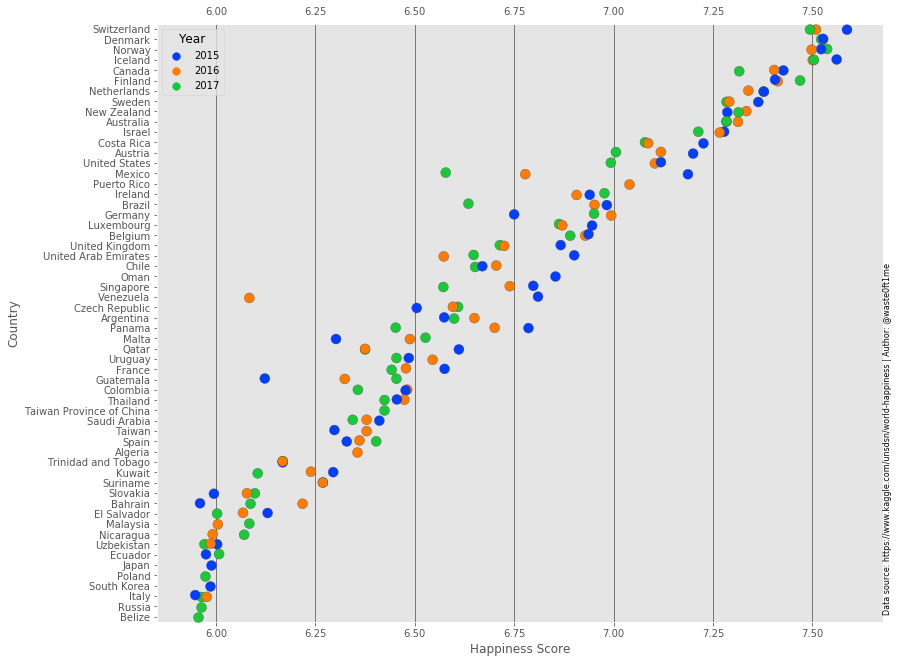

In [139]:
#Let's plot
f, ax = plt.subplots(figsize=(13,11))

sns.stripplot(ax = ax, palette=sns.color_palette("bright"), size=10, orient='h', linewidth=0.3, 
              y = 'Country', x = 'Happiness Score', hue='Year', data=happiness_top)

ax.tick_params(axis = 'x', grid_color='black', grid_alpha=0.6, labeltop=True)

f.text(0.90, 0.57, "Data source: https://www.kaggle.com/unsdsn/world-happiness |"
        " Author: @waste0ft1me", fontsize=8, rotation=90);  

plt.savefig("fig2.png", bbox_inches='tight', transparent=True)

 **Gender Statistics dataset**

In [18]:
# Time to take a look at the Gender Stats Dataset
df_gender_stats.head()

,Series Name,Series Code,Country Name,Country Code,2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018]
0,Ratio of female to male labor force participat...,SL.TLF.CACT.FM.ZS,Afghanistan,AFG,21.584501,22.393533,22.457099,22.516028
1,Ratio of female to male labor force participat...,SL.TLF.CACT.FM.ZS,Albania,ALB,73.166459,72.923613,72.796508,72.710545
2,Ratio of female to male labor force participat...,SL.TLF.CACT.FM.ZS,Algeria,DZA,22.600120,22.442984,22.619880,22.782530
3,Ratio of female to male labor force participat...,SL.TLF.CACT.FM.ZS,American Samoa,ASM,NaN,NaN,NaN,NaN
4,Ratio of female to male labor force participat...,SL.TLF.CACT.FM.ZS,Andorra,AND,NaN,NaN,NaN,NaN


In [19]:
# Dropping irrelevant columns
df_gender_stats = df_gender_stats.drop(columns=['Series Name','Country Code'], axis=1)

In [20]:
# We can use some wrangling here, placing the feaures as columns 
df_wrangled = pd.DataFrame()

for year in ('2015 [YR2015]','2016 [YR2016]', '2017 [YR2017]'):
    df_partial = pd.pivot_table(df_gender_stats, values=year, index='Country Name', columns='Series Code', aggfunc='first')
    df_partial['Year'] = year 
    
    df_wrangled = pd.concat([df_wrangled,df_partial], sort=True)
 
    
df_wrangled.head()

,NY.GDP.PCAP.CD,SE.ENR.TERT.FM.ZS,SE.SCH.LIFE.FE,SE.SCH.LIFE.MA,SE.TER.CMPL.FE.ZS,SE.TER.CMPL.MA.ZS,SE.TER.CUAT.BA.FE.ZS,SE.TER.CUAT.BA.MA.ZS,SE.TER.ENRR.FE,SE.TER.ENRR.MA,...,SP.ADO.TFRT,SP.DYN.CBRT.IN,SP.DYN.CDRT.IN,SP.DYN.TFRT.IN,SP.POP.TOTL,SP.POP.TOTL.FE.IN,SP.POP.TOTL.FE.ZS,SP.RUR.TOTL.FE.ZS,SP.RUR.TOTL.MA.ZS,Year
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,590.076474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,73.1264,33.980,6.924,4.802,33736494.0,16346869.0,48.454558,36.157715,37.138751,2015 [YR2015]
Albania,3952.830781,1.53051,16.13023,15.33139,60.5861,30.57727,NaN,NaN,81.65209,53.34966,...,20.6922,11.879,7.217,1.714,2880703.0,1426369.0,49.514599,21.057572,21.526909,2015 [YR2015]
Algeria,4162.852181,1.56353,NaN,NaN,NaN,NaN,NaN,NaN,45.07580,28.82954,...,10.7052,23.900,4.773,2.839,39871528.0,19738058.0,49.504141,14.372554,14.899220,2015 [YR2015]
American Samoa,11901.975260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,55537.0,NaN,NaN,NaN,NaN,2015 [YR2015]
Andorra,36038.267604,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,78014.0,NaN,NaN,NaN,NaN,2015 [YR2015]


In [21]:
# Removing column name and reseting indexes caused by wrangling (pivot_table)
df_wrangled.columns.name = None
df_wrangled.reset_index(inplace=True)

# Test
df_wrangled.loc[df_wrangled['Country Name']=='Algeria']


,Country Name,NY.GDP.PCAP.CD,SE.ENR.TERT.FM.ZS,SE.SCH.LIFE.FE,SE.SCH.LIFE.MA,SE.TER.CMPL.FE.ZS,SE.TER.CMPL.MA.ZS,SE.TER.CUAT.BA.FE.ZS,SE.TER.CUAT.BA.MA.ZS,SE.TER.ENRR.FE,...,SP.ADO.TFRT,SP.DYN.CBRT.IN,SP.DYN.CDRT.IN,SP.DYN.TFRT.IN,SP.POP.TOTL,SP.POP.TOTL.FE.IN,SP.POP.TOTL.FE.ZS,SP.RUR.TOTL.FE.ZS,SP.RUR.TOTL.MA.ZS,Year
2,Algeria,4162.852181,1.56353,NaN,NaN,NaN,NaN,NaN,NaN,45.07580,...,10.7052,23.900,4.773,2.839,39871528.0,19738058.0,49.504141,14.372554,14.89922,2015 [YR2015]
219,Algeria,3943.497550,1.67123,NaN,NaN,NaN,NaN,NaN,NaN,53.62242,...,10.4216,23.132,4.765,2.776,40606052.0,20100149.0,49.500379,NaN,NaN,2016 [YR2016]
436,Algeria,4055.247211,1.48917,NaN,NaN,35.12156,18.13316,NaN,NaN,57.31238,...,NaN,NaN,NaN,NaN,41318142.0,20451754.0,49.498242,NaN,NaN,2017 [YR2017]


In [22]:
# Subsetting and renaming the columns of interest
df_wrangled = df_wrangled[['Country Name','Year','SP.ADO.TFRT','SL.EMP.TOTL.SP.MA.NE.ZS','SL.EMP.TOTL.SP.FE.NE.ZS','SP.DYN.TFRT.IN', 'NY.GDP.PCAP.CD',
'SL.TLF.TOTL.FE.ZS','SP.POP.TOTL.FE.ZS','SE.ENR.TERT.FM.ZS','SE.TER.ENRR.FE','SE.TER.ENRR.MA',
'SL.UEM.TOTL.FE.ZS','SL.UEM.TOTL.MA.ZS','SG.GEN.MNST.ZS']]
df_wrangled.rename(columns={'Country Name':'Country',
                            'SP.ADO.TFRT':'Adolescent fertility rate',
                            'SL.EMP.TOTL.SP.MA.NE.ZS': 'Employment % male', 
                            'SL.EMP.TOTL.SP.FE.NE.ZS': 'Employment % female',
                            'SP.DYN.TFRT.IN':'Fertility rate total',
                            'NY.GDP.PCAP.CD':'GDP per capita',
                            'SL.TLF.TOTL.FE.ZS':'Labor force % female',
                            'SP.POP.TOTL.FE.ZS':'Population % female',
                            'SE.ENR.TERT.FM.ZS':'School enrollment tertiary GPI',
                            'SE.TER.ENRR.FE':'School enrollment tertiary, female',
                            'SE.TER.ENRR.MA':'School enrollment tertiary, male',
                            'SL.UEM.TOTL.FE.ZS':'Unemployment % female',
                            'SL.UEM.TOTL.MA.ZS':'Unemployment % male',
                            'SG.GEN.MNST.ZS':'% Women in ministerial level positions'
                           }, inplace=True)

### Gender Statistics dataset - dictionary

**SP.ADO.TFRT**: Adolescent fertility rate (births per 1,000 women ages 15-19)	Adolescent fertility rate is the number of births per 1,000 women ages 15-19.

**SL.EMP.TOTL.SP.MA.NE.ZS**: Employment to population ratio, 15+, male (%) (national estimate)

**SL.EMP.TOTL.SP.FE.NE.ZS**: Employment to population ratio, 15+, female (%) (national estimate)

**SP.DYN.TFRT.IN**: Fertility rate, total (births per woman)

**NY.GDP.PCAP.CD**: GDP per capita (current US$)

**SL.TLF.TOTL.FE.ZS**: Labor force, female (% of total labor force)

**SP.POP.TOTL.FE.ZS**: Population, female (% of total)

**SE.ENR.TERT.FM.ZS**: School enrollment, tertiary (gross), gender parity index (GPI)

**SE.TER.ENRR.FE**: School enrollment, tertiary, female (% gross)

**SE.TER.ENRR.MA**:	School enrollment, tertiary, male (% gross)

**SL.UEM.TOTL.FE.ZS**: Unemployment, female (% of female labor force) (modeled ILO estimate)

**SL.UEM.TOTL.MA.ZS**: Unemployment, male (% of male labor force) (modeled ILO estimate)

**SG.GEN.MNST.ZS**: Proportion of women in ministerial level positions (%)


In [23]:
df_wrangled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 15 columns):
Country                                   651 non-null object
Year                                      651 non-null object
Adolescent fertility rate                 388 non-null float64
Employment % male                         310 non-null float64
Employment % female                       312 non-null float64
Fertility rate total                      401 non-null float64
GDP per capita                            596 non-null float64
Labor force % female                      558 non-null float64
Population % female                       579 non-null float64
School enrollment tertiary GPI            287 non-null float64
School enrollment tertiary, female        287 non-null float64
School enrollment tertiary, male          287 non-null float64
Unemployment % female                     561 non-null float64
Unemployment % male                       561 non-null float64
% Women in mini

In [24]:
def merge_datasets (df_total, df_wrangled):
    '''
    INPUT 
        df_total - the world happiness dataset (2015-2018).
        df_wrangled - the gender statistics dataset

    OUTPUT
        df_final - resulting dataset after merging df_total and df_wrangled
        df_final_2015 - df_final where 'Year' = 2015
        df_final_2016 - df_final where 'Year' = 2016
        df_final_2017 - df_final where 'Year' = 2017
    '''
    # Subsetting happiest countries 
    happiness_top = df_total[['Country','Happiness Rank', 'Happiness Score', 
                        'Year']].sort_values(by=['Happiness Rank', 'Year'])[:150]
    # Subsetting by Year
    htop_2015 = happiness_top.loc[happiness_top['Year']==2015]
    htop_2016 = happiness_top.loc[happiness_top['Year']==2016]
    htop_2017 = happiness_top.loc[happiness_top['Year']==2017]

    # Obtaining the happiest countries names
    happiness_top_countries = happiness_top['Country'].unique()

    # Subsetting only the gender stats data for the happiest countries
    gender_stats_wrangled = df_wrangled.loc[df_wrangled['Country'].isin(happiness_top_countries)].sort_values(by=['Country', 'Year'])
    for year in ('2015 [YR2015]','2016 [YR2016]', '2017 [YR2017]'):
        print("\nResulting Gender Stats dataframe missing values for :{}".format(year))
        print(gender_stats_wrangled[gender_stats_wrangled['Year']==year].isnull().sum()/gender_stats_wrangled[gender_stats_wrangled['Year']==year].shape[0])
        print("Shape:{}".format(gender_stats_wrangled[gender_stats_wrangled['Year']==year].shape))

    # Dealing with missing values with ffill and bfill (Copy the previous value or next one if applicable)
    # Filling with mean/median/mode the missing values might not be best in this situation.
    gender_stats_wrangled = gender_stats_wrangled.groupby('Country').ffill().bfill()
    print("Resulting Gender Stats dataframe info - after filling missing values: \n")
    print(gender_stats_wrangled.info())

    # Creating a df per year for the gender stats df
    df_wrangled_2015 = gender_stats_wrangled.loc[gender_stats_wrangled['Year']=='2015 [YR2015]']
    df_wrangled_2016 = gender_stats_wrangled.loc[gender_stats_wrangled['Year']=='2016 [YR2016]']
    df_wrangled_2017 = gender_stats_wrangled.loc[gender_stats_wrangled['Year']=='2017 [YR2017]']

    # Merging gender stats df with happiest ranks df
    df_final_2015 = pd.merge(htop_2015,df_wrangled_2015,how='inner', on='Country')
    df_final_2016 = pd.merge(htop_2016,df_wrangled_2016,how='inner', on='Country')
    df_final_2017 = pd.merge(htop_2017,df_wrangled_2017,how='inner', on='Country')

    # The ultimate df
    df_final =  df_final_2015.append(df_final_2016.append(df_final_2017, sort=False), sort=False)
    
    return df_final, df_final_2015, df_final_2016, df_final_2017

In [25]:
df_final, df_final_2015, df_final_2016, df_final_2017 = merge_datasets(df_total=df_total, df_wrangled=df_wrangled)


Resulting Gender Stats dataframe missing values for :2015 [YR2015]
Country                                   0.000000
Year                                      0.000000
Adolescent fertility rate                 0.000000
Employment % male                         0.115385
Employment % female                       0.096154
Fertility rate total                      0.000000
GDP per capita                            0.000000
Labor force % female                      0.000000
Population % female                       0.000000
School enrollment tertiary GPI            0.153846
School enrollment tertiary, female        0.153846
School enrollment tertiary, male          0.153846
Unemployment % female                     0.000000
Unemployment % male                       0.000000
% Women in ministerial level positions    0.019231
dtype: float64
Shape:(52, 15)

Resulting Gender Stats dataframe missing values for :2016 [YR2016]
Country                                   0.000000
Year              

### Visualization and Results

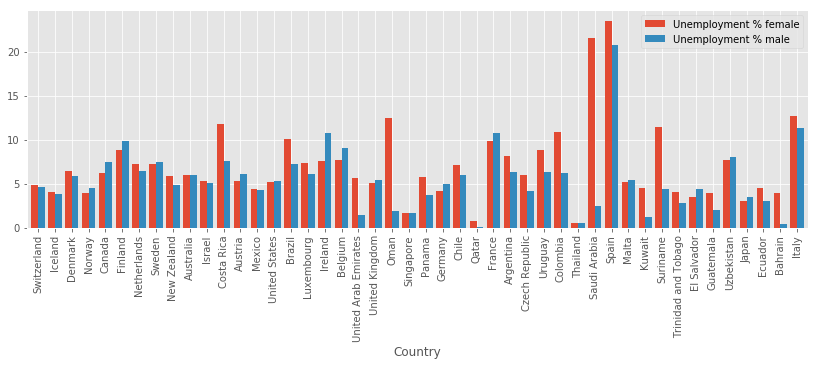

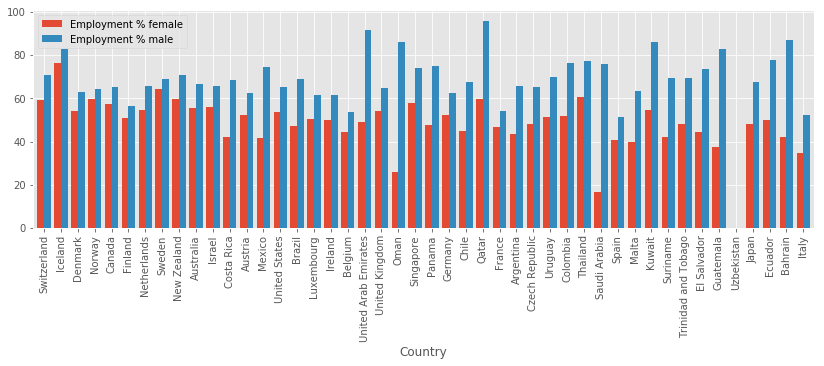

In [26]:
f = (14,4)
w = 0.8
# Unemployment rate between females and males
df_final_2015.plot(figsize=f, width=w, kind='bar',x='Country', y=['Unemployment % female','Unemployment % male'])
# Employment to population ratio 15+
df_final_2015.plot(figsize=f, width=w, kind='bar',x='Country', y=['Employment % female','Employment % male'])
# Employment difference
#df_final_2015['Employment Difference'] = df_final_2015['Employment % male'] - df_final_2016['Employment % female']
#df_final_2015.plot(figsize=f, width=w, kind='bar',x='Country', y=['Employment Difference'])

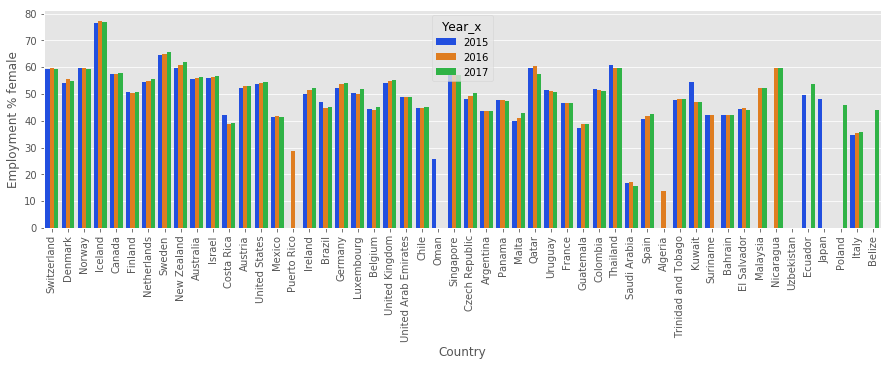

In [27]:
# Employment to population ratio 15+, 2015 - 2017, female
f, ax = plt.subplots(figsize=(15,4))
#df = df_final.sort_values(by=['Happiness Rank', 'Year_x'])
sns.barplot(ax = ax, palette=sns.color_palette("bright"), orient='v', 
            linewidth=0.1, x = 'Country', y = 'Employment % female',
            hue='Year_x',  
            data=df_final.sort_values(by=['Happiness Rank', 'Year_x']))
ax.tick_params(axis = 'x', grid_color='black', grid_alpha=0.6)
plt.xticks(rotation=90);


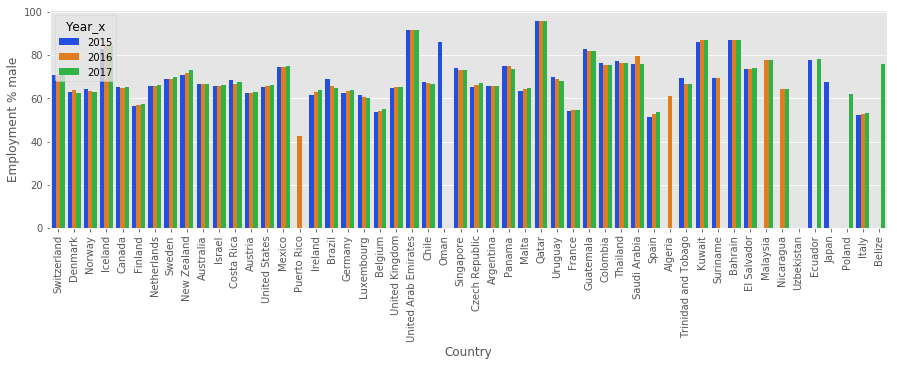

In [28]:
# Employment to population ratio 15+, 2015 - 2017, male
f, ax = plt.subplots(figsize=(15,4))
#df = df_final.sort_values(by=['Happiness Rank', 'Year_x'])
sns.barplot(ax = ax, palette=sns.color_palette("bright"), orient='v', 
            linewidth=0.1, x = 'Country', y = 'Employment % male',
            hue='Year_x',  
            data=df_final.sort_values(by=['Happiness Rank', 'Year_x']))
ax.tick_params(axis = 'x', grid_color='black', grid_alpha=0.6)
plt.xticks(rotation=90);

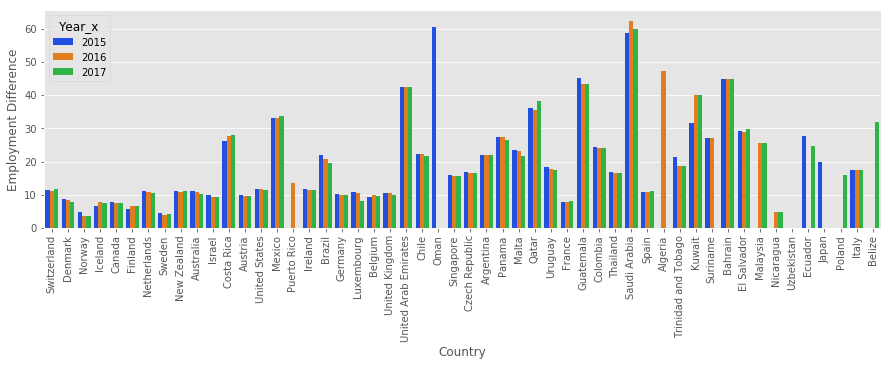

In [29]:
# Employment difference, 2015-2017
df_final['Employment Difference'] = df_final['Employment % male'] - df_final['Employment % female']

f, ax = plt.subplots(figsize=(15,4))

sns.barplot(ax = ax, palette=sns.color_palette("bright"), orient='v', 
            linewidth=0.3, x = 'Country', y = 'Employment Difference',
            hue='Year_x',  
            data=df_final.sort_values(by=['Happiness Rank', 'Year_x']))
ax.tick_params(axis = 'x', grid_color='black', grid_alpha=0.6)
plt.xticks(rotation=90);


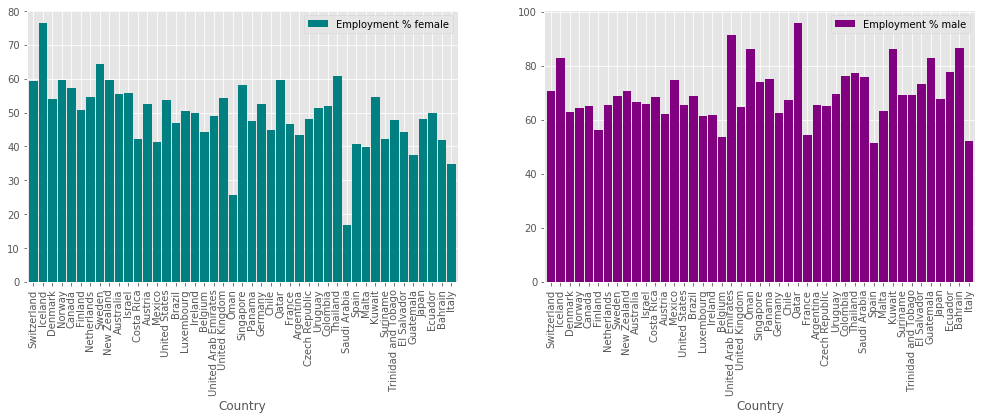

In [51]:
def create_subplots(df, columns=[]):
    f, (ax1,ax2) = plt.subplots(figsize=(17,5), nrows=1, ncols=2)
    df.sort_values(by=['Happiness Rank']).plot(ax=ax1,width=0.9, color='teal', kind='bar',x='Country',y=columns[0])
    #ax1.tick_params(axis = 'y', grid_color='black', grid_alpha=0.6)
    #ax.set_title(title)

    df.sort_values(by=['Happiness Rank']).plot(ax=ax2, width=0.9, color='purple', kind='bar',x='Country', y=columns[1])
    #ax2.tick_params(axis = 'y', grid_color='black', grid_alpha=0.6)
    #ax.set_title(title)
    
create_subplots(df_final_2015.dropna(), columns=['Employment % female', 'Employment % male'])
#create_subplots(df_final_2016.dropna(), columns=['Employment % female', 'Employment % male'])
#create_subplots(df_final_2017.dropna(), columns=['Employment % female', 'Employment % male'])

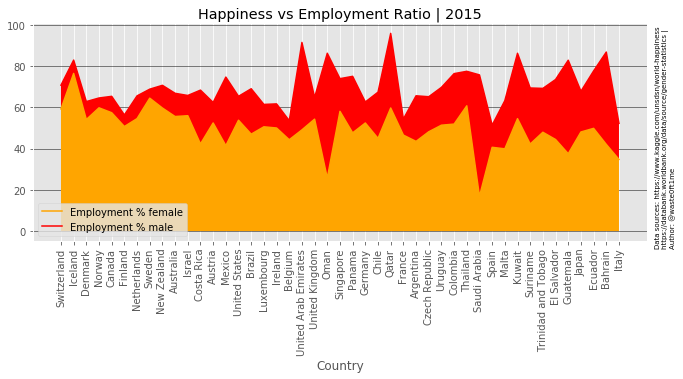

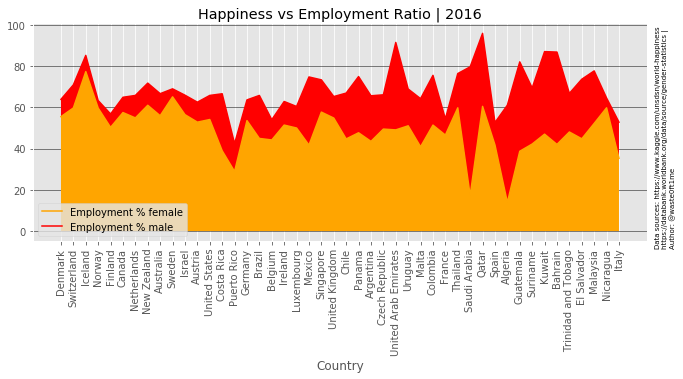

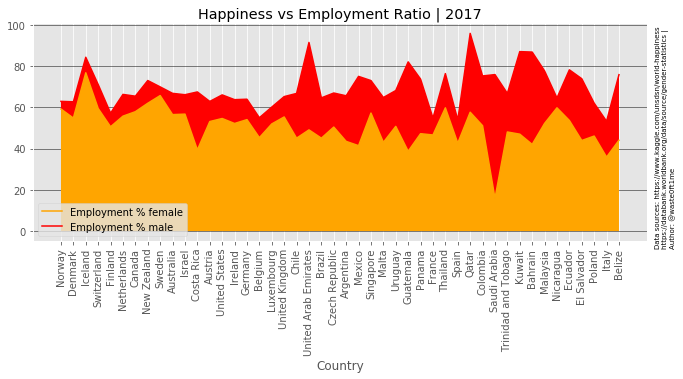

In [124]:
def plot_lines(df, columns=[],color1='Orange',color2='Red',alpha=1,title=''):
    '''
    INPUT 
        df - dataset
        columns - feature(s) to be plotted
        color1 - color for the first feature
        color2 - color for the second feature
        alpha - level of transparency
        title - Plot title

    OUTPUT
        plot
    '''
    f, ax = plt.subplots(figsize=(11,4))
    df.sort_values(by=['Happiness Rank']).plot(ax=ax,x='Country',y=columns[0], color=color1)
    ax.fill_between(df['Country'],df[columns[0]], facecolor=color1, alpha=alpha)
    df.sort_values(by=['Happiness Rank']).plot(ax=ax,x='Country',y=columns[1], color=color2)
    ax.fill_between(df['Country'],df[columns[1]],df[columns[0]],interpolate=True, facecolor=color2, alpha=alpha)
    ax.tick_params(axis = 'y', grid_color='black', grid_alpha=0.6)
    ax.set_title(title)
    plt.xticks(rotation=90)
    f.text(0.91, 0.8, "Data sources: https://www.kaggle.com/unsdsn/world-happiness\nhttps://databank.worldbank.org/data/source/gender-statistics | "
        "\nAuthor: @waste0ft1me", fontsize=7, rotation=90, ha="left") 
    plt.savefig(title, bbox_inches='tight', transparent=True)

plot_lines(df_final_2015.dropna(), columns=['Employment % female', 'Employment % male'], title='Happiness vs Employment Ratio | 2015')
plot_lines(df_final_2016.dropna(), columns=['Employment % female', 'Employment % male'], title='Happiness vs Employment Ratio | 2016')
plot_lines(df_final_2017.dropna(), columns=['Employment % female', 'Employment % male'], title='Happiness vs Employment Ratio | 2017')

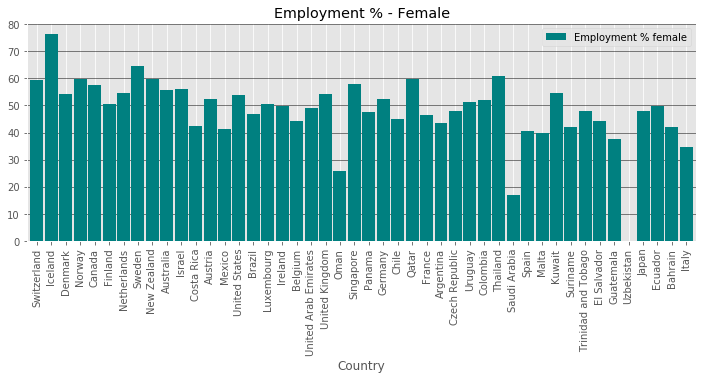

In [32]:
def plot_column(df, columns = 'Employment % female', title='', color='Teal'):
    '''
    INPUT 
        df - dataset
        columns - feature(s) to be plotted
        title - Plot title
        color = Bar's color

    OUTPUT
        barplot
    '''
    f, ax = plt.subplots(figsize=(12,4))
    #df = df_final.sort_values(by=['Happiness Rank', 'Year_x'])
    df.sort_values(by=['Happiness Rank']).plot(ax= ax, width=0.9, color=color, kind='bar',x='Country', y=columns)
    ax.tick_params(axis = 'y', grid_color='black', grid_alpha=0.6)
    ax.set_title(title)
    #plt.xticks(rotation=90);
    
plot_column(df_final_2015, title='Employment % - Female')
#plot_column(df_final_2016, title='Employment % - Female', color='Maroon')
#plot_column(df_final_2017, title='Employment % - Female', color='purple')

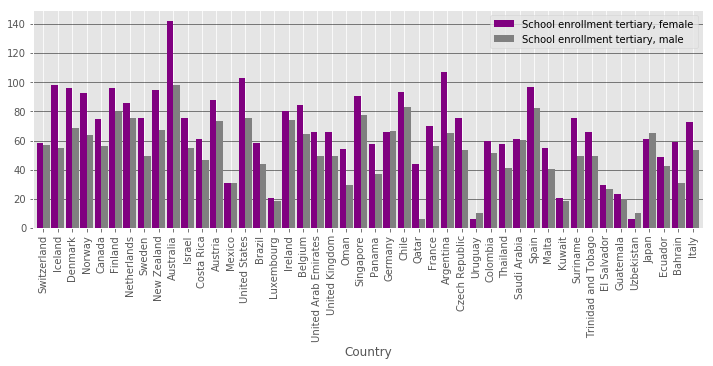

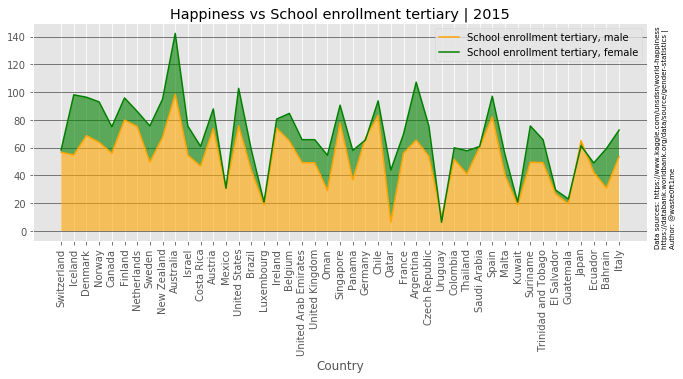

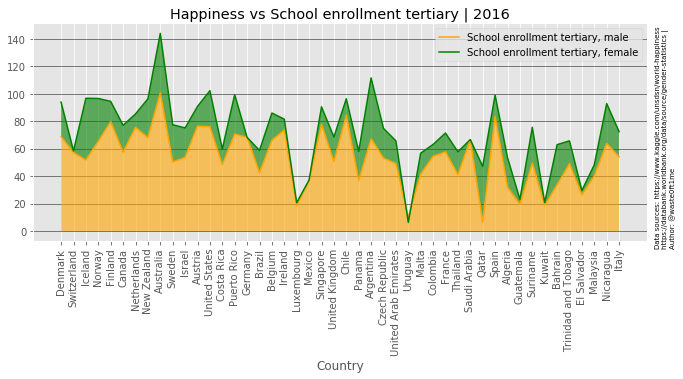

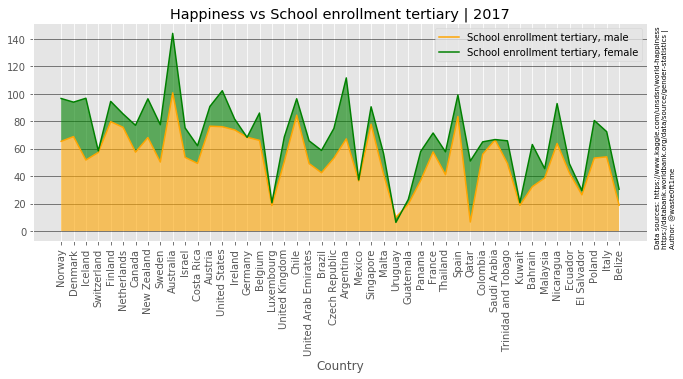

In [125]:
# School enrollment, tertiary
#df_final_2015.plot(kind='bar',x='Country', y=['School enrollment tertiary, female','School enrollment tertiary, male'])

plot_column(columns=['School enrollment tertiary, female','School enrollment tertiary, male'], df=df_final_2015, color=['Purple','Grey'])
#plot_column(columns=['School enrollment tertiary, female','School enrollment tertiary, male'], df=df_final_2016, color=['#FF6600','#339900'])
#plot_column(columns=['School enrollment tertiary, female','School enrollment tertiary, male'], df=df_final_2017, color=['#FF0000', '#660066'])

plot_lines(df_final_2015.dropna(), columns=['School enrollment tertiary, male','School enrollment tertiary, female'], 
           color1='Orange',color2='Green',alpha=0.6, title='Happiness vs School enrollment tertiary | 2015')

plot_lines(df_final_2016.dropna(), columns=['School enrollment tertiary, male','School enrollment tertiary, female'], 
           color1='Orange',color2='Green',alpha=0.6, title='Happiness vs School enrollment tertiary | 2016')

plot_lines(df_final_2017.dropna(), columns=['School enrollment tertiary, male','School enrollment tertiary, female'], 
           color1='Orange',color2='Green',alpha=0.6, title='Happiness vs School enrollment tertiary | 2017')

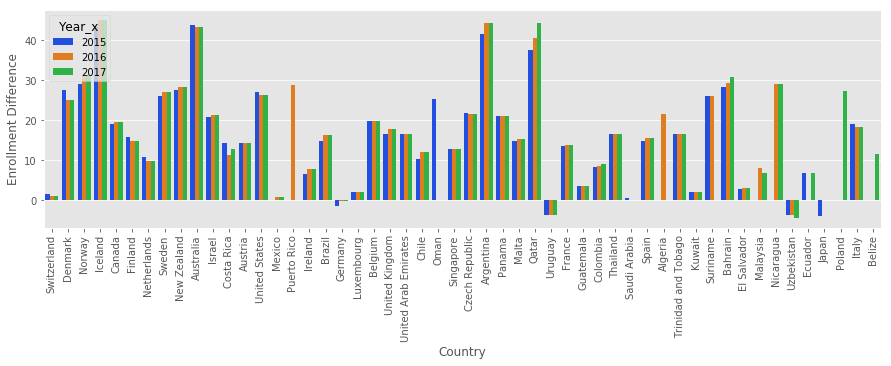

In [140]:
# Employment difference, 2015-2017
df_final['Enrollment Difference'] = df_final['School enrollment tertiary, female'] - df_final['School enrollment tertiary, male']
#['School enrollment tertiary, male','School enrollment tertiary, female']
f, ax = plt.subplots(figsize=(15,4))

sns.barplot(ax = ax, palette=sns.color_palette("bright"), orient='v', 
            linewidth=0.3, x = 'Country', y = 'Enrollment Difference',
            hue='Year_x',  
            data=df_final.sort_values(by=['Happiness Rank', 'Year_x']))
ax.tick_params(axis = 'x', grid_color='black', grid_alpha=0.6)
plt.xticks(rotation=90);

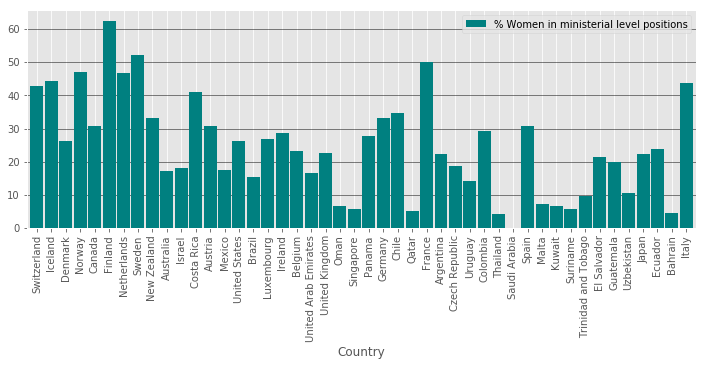

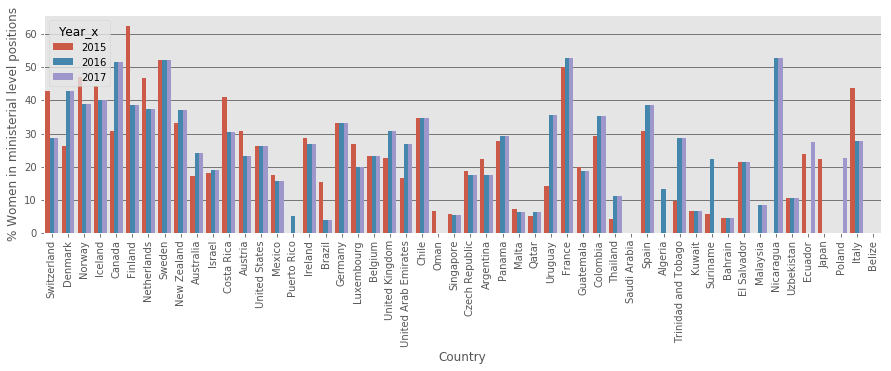

In [34]:
#df_final_2015.plot(kind='bar',x='Country', y=['% Women in ministerial level positions'])
plot_column(df_final_2015, columns='% Women in ministerial level positions')
#plot_column(df_final_2016, columns='% Women in ministerial level positions')
#plot_column(df_final_2017, columns='% Women in ministerial level positions')
f, ax = plt.subplots(figsize=(15,4))

sns.barplot(ax = ax, orient='v', 
            linewidth=0.1, x = 'Country', y = '% Women in ministerial level positions',
            hue='Year_x',
            data=df_final.sort_values(by=['Happiness Rank', 'Year_x']))
ax.tick_params(axis = 'y', grid_color='black', grid_alpha=0.6)
plt.xticks(rotation=90);



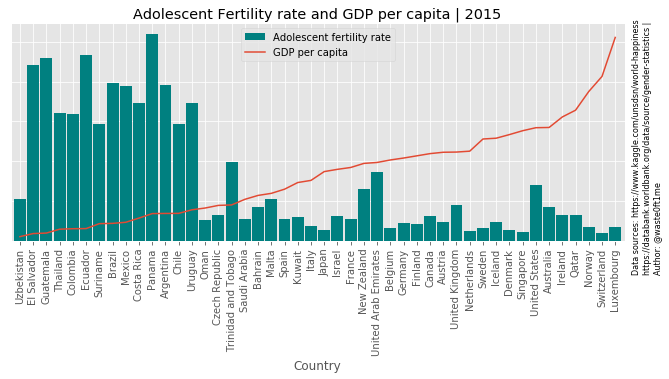

In [136]:
# Adolescent fertility rate
#plot_column(df=df_final_2015, columns='Adolescent fertility rate')

def normalize(data):
    return (data)/(max(data)-min(data))

df_temp = df_final_2015.loc[:,['Happiness Rank','Country','Adolescent fertility rate','GDP per capita']]
df_temp['Ado_fert_norm'] = normalize(df_temp['Adolescent fertility rate'])
df_temp['GDP_norm'] = normalize(df_temp['GDP per capita'])

f, ax= plt.subplots(figsize=(11,4))
df_temp.sort_values(by=['GDP_norm']).plot(ax=ax,width=0.9, color='teal', kind='bar',x='Country',y='Ado_fert_norm',
                                         label='Adolescent fertility rate')
df_temp.sort_values(by=['GDP_norm']).plot(ax=ax,x='Country', y='GDP_norm', label= 'GDP per capita')
plt.xticks(rotation=90);

ax.set_title("Adolescent Fertility rate and GDP per capita | 2015")
ax.spines['right'].set_visible(False)
ax.tick_params(axis="both", which="both", top=False, left=False, right=False, labelleft=False)
f.text(0.91, 0.8, "Data sources: https://www.kaggle.com/unsdsn/world-happiness\nhttps://databank.worldbank.org/data/source/gender-statistics | "
        "\nAuthor: @waste0ft1me", fontsize=8, rotation=90, ha="left") 
plt.savefig("GPDvsAdo", bbox_inches='tight', transparent=True)




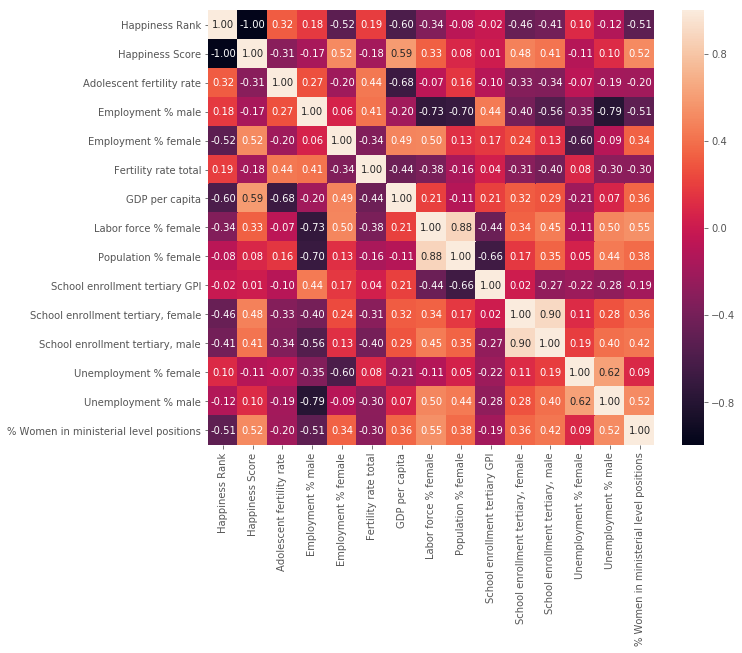

In [73]:
# Correlation coef matrix for 2015
plt.rcParams['figure.figsize'] = 10,8
sns.heatmap(df_final_2015.drop(columns='Year_x', axis=1).corr(), annot=True, fmt=".2f")

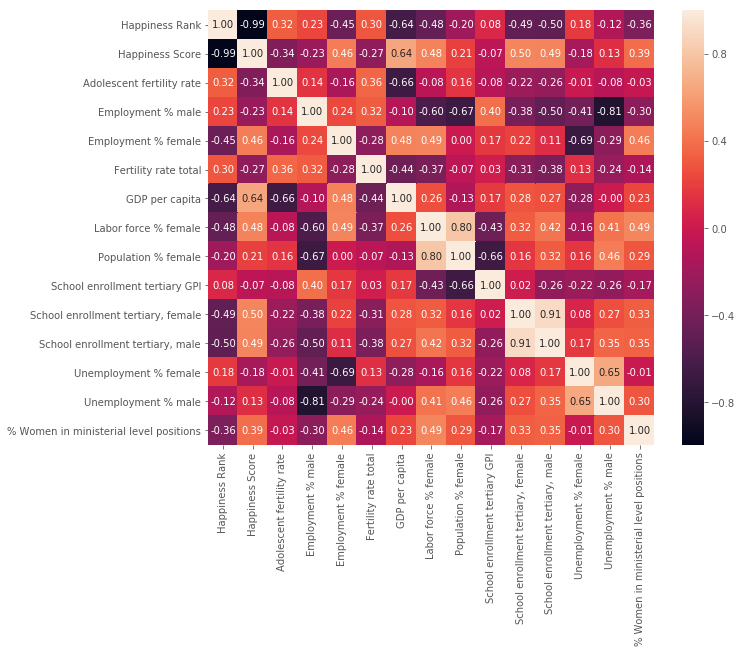

In [68]:
# Correlation coef matrix for 2016
 
sns.heatmap(df_final_2016.drop(columns='Year_x', axis=1).corr(), annot=True, fmt=".2f")

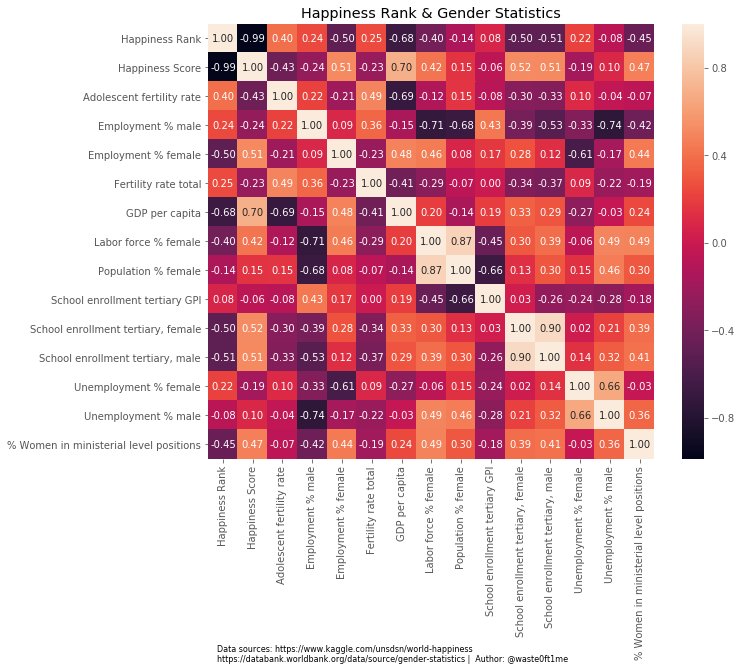

In [77]:
# Correlation coef matrix for 2017
fig = sns.heatmap(df_final_2017.drop(columns='Year_x', axis=1).corr(), annot=True,fmt=".2f")
fig.set_title("Happiness Rank & Gender Statistics")
fig.text(0.3, 22, "Data sources: https://www.kaggle.com/unsdsn/world-happiness\nhttps://databank.worldbank.org/data/source/gender-statistics | "
        " Author: @waste0ft1me", fontsize=8);  
plt.savefig("fig3.png", bbox_inches='tight')

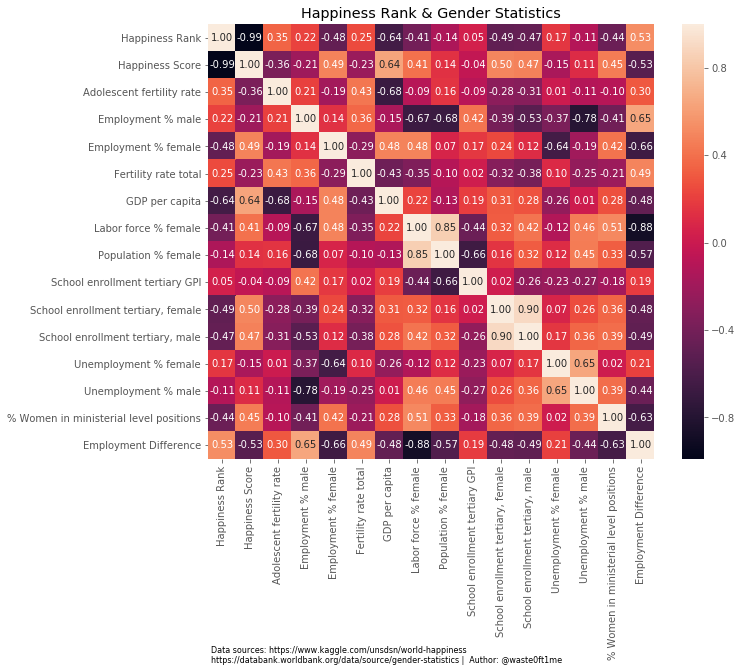

In [135]:
# Correlation coef matrix for the entire dataset
fig = sns.heatmap(df_final.drop(columns='Year_x', axis=1).corr(), annot=True, fmt=".2f")
fig.set_title("Happiness Rank & Gender Statistics")
fig.text(0.1, 23.5, "Data sources: https://www.kaggle.com/unsdsn/world-happiness\nhttps://databank.worldbank.org/data/source/gender-statistics | "
        " Author: @waste0ft1me", fontsize=8)  
plt.savefig("fig4.png", bbox_inches='tight', transparency=True);